In [64]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

In [65]:
iris = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :4]
y = iris[:, 4]

maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X-avg) / (maxi-mini)

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)
m = X.shape[0]

print('X_b', X_b.shape)
print('y', y.shape)
print('m', m)

X_b (100, 5)
y (100,)
m 100


In [66]:
print(X_b[:5])
print(y[:5])

[[ 1.          0.29666667  0.06478261 -0.23956522 -0.41347826]
 [ 1.          0.26768116 -0.00768116 -0.23956522 -0.41347826]
 [ 1.          0.23869565  0.02130435 -0.25405797 -0.41347826]
 [ 1.          0.2242029   0.00681159 -0.22507246 -0.41347826]
 [ 1.          0.28217391  0.07927536 -0.23956522 -0.41347826]]
[0. 0. 0. 0. 0.]


In [67]:
#activation

def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prim(y_hat):
    return y_hat * (1 - y_hat)

def tanh_function(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def tanh_prim(y_hat):
    return 1 - y_hat**2

In [68]:
#loss

def mse(y_hat, y):
    return (y_hat - y)**2

def mse_prim(y_hat, y):
    return y_hat - y

# def abs_loss(y_hat, y):
#     return np.abs(y_hat, y)

# def abs_loss_prim(y_hat, y):
#     return 

def bnc_loss_sigmoid(y_hat, y):
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def bnc_loss_tanh(y_hat, y):
    h_scale = (y_hat + 1)/2
    return (-y * np.log(h_scale) - (1 - y) * np.log(1 - h_scale)).mean()

def bnc_prim(y_hat, y):
    return (y_hat - y) / (y_hat * (1 - y_hat))


In [69]:
#training

lr = 0.1
epochs = 100
batch_size = m

theta = np.array([0.1, 0.5, 0.1, 0.5, -0.1])

losses = []
accs = []

for epoch in range(epochs):
    shuff_ind = np.random.permutation(m)
    X_b_shuff = X_b[shuff_ind]
    y_shuff = y[shuff_ind]

    for i in range(0, m, batch_size):
        xi = X_b_shuff[i:i+batch_size]
        yi = y_shuff[i:i+batch_size]

        z = np.dot(xi, theta)
        y_hat = sigmoid_function(z)

        loss = bnc_loss_sigmoid(y_hat, yi)

        gradient = np.dot(xi.T, (bnc_prim(y_hat, yi) * sigmoid_prim(y_hat))) / yi.size

        theta -= lr*gradient

        losses.append(loss)

        #accuracy
        preds = sigmoid_function(np.dot(xi, theta)).round()
        # preds = tanh_function(np.dot(xi, theta)).round() / 2 + 0.5
        acc = (preds == yi).mean()
        accs.append(acc)

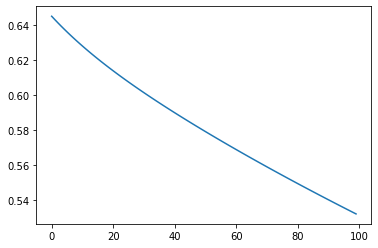

In [70]:
plt.plot(losses)
plt.show()

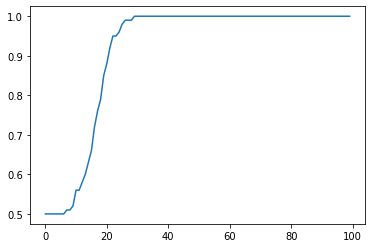

In [71]:
plt.plot(accs)
plt.show()

In [72]:
preds = sigmoid_function(np.dot(xi, theta)).round()
print(preds)
print(yi)

[0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0.]
